In [1]:
# Import library

import warnings
warnings.filterwarnings("ignore")
from datetime import date
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling 
%pylab inline


import seaborn as sns
import statsmodels.api as sm

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import excel data file
data = pd.read_excel("Time Series Sample.xlsx") 
data.head()

,DATE,XNSE/BIOCON/OPEN,XNSE/BIOCON/HIGH,XNSE/BIOCON/LOW,XNSE/BIOCON/CLOSE,XNSE/BIOCON/VOLUME,XNSE/BIOCON/ADJUSTMENT FACTOR,XNSE/BIOCON/ADJUSTMENT TYPE,DATE.1,XNSE/DMART/OPEN,...,XNSE/SYNGENE/ADJUSTMENT FACTOR,XNSE/SYNGENE/ADJUSTMENT TYPE,DATE.9,XNSE/TITAN/OPEN,XNSE/TITAN/HIGH,XNSE/TITAN/LOW,XNSE/TITAN/CLOSE,XNSE/TITAN/VOLUME,XNSE/TITAN/ADJUSTMENT FACTOR,XNSE/TITAN/ADJUSTMENT TYPE
0,2020-09-21,453.95,453.95,425.35,429.35,4258326.0,NaN,NaN,2020-09-21,2175.00,...,NaN,NaN,2016-11-23,303.628352,308.541432,300.926158,307.067508,1250719,NaN,NaN
1,2020-09-18,442.75,463.90,442.75,454.00,11410425.0,NaN,NaN,2020-09-18,2149.90,...,NaN,NaN,2016-11-24,305.593584,309.229263,300.680504,302.203558,2751768,NaN,NaN
2,2020-09-17,439.00,444.85,432.55,442.20,4431118.0,NaN,NaN,2020-09-17,2147.00,...,NaN,NaN,2016-11-25,305.495322,313.651035,300.975288,310.654056,1285140,NaN,NaN
3,2020-09-16,440.05,453.90,434.55,438.65,10058926.0,NaN,NaN,2020-09-16,2152.55,...,NaN,NaN,2016-11-28,311.440149,312.471896,298.469618,301.220942,1676934,NaN,NaN
4,2020-09-15,430.00,445.00,429.00,440.05,6044433.0,NaN,NaN,2020-09-15,2185.00,...,NaN,NaN,2016-11-29,300.680504,310.752318,299.943542,308.394039,1450559,NaN,NaN


In [3]:
# To check the shape of data like number of rows and columns
data.shape

(1000, 80)

In [4]:
# create the new data set of volume varible 
df = data[['XNSE/BIOCON/VOLUME','XNSE/DMART/VOLUME','XNSE/COLPAL/VOLUME','XNSE/RELIANCE/VOLUME','XNSE/INFY/VOLUME','XNSE/MANAPPURAM/VOLUME','XNSE/ICICIBANK/VOLUME','XNSE/HDFCAMC/VOLUME','XNSE/SYNGENE/VOLUME','XNSE/TITAN/VOLUME']]
df.head()

,XNSE/BIOCON/VOLUME,XNSE/DMART/VOLUME,XNSE/COLPAL/VOLUME,XNSE/RELIANCE/VOLUME,XNSE/INFY/VOLUME,XNSE/MANAPPURAM/VOLUME,XNSE/ICICIBANK/VOLUME,XNSE/HDFCAMC/VOLUME,XNSE/SYNGENE/VOLUME,XNSE/TITAN/VOLUME
0,4258326.0,1140224.0,872594,15519433.0,14140790,4456898,1.715485e+07,NaN,121964,1250719
1,11410425.0,1204363.0,935110,15264101.0,12897897,3437264,2.256316e+07,NaN,55866,2751768
2,4431118.0,244384.0,423527,11919991.0,15628308,5286738,1.661170e+07,NaN,131112,1285140
3,10058926.0,391188.0,271029,15669133.0,10059392,3188591,3.293972e+07,NaN,286736,1676934
4,6044433.0,1115664.0,291168,12543161.0,11608223,8672740,3.232966e+07,NaN,153388,1450559


In [5]:
# caluulate the mean of each stock of volume
MEAN = df.mean()
MEAN

XNSE/BIOCON/VOLUME        4.809964e+06
XNSE/DMART/VOLUME         7.755276e+05
XNSE/COLPAL/VOLUME        4.749458e+05
XNSE/RELIANCE/VOLUME      9.951893e+06
XNSE/INFY/VOLUME          8.940641e+06
XNSE/MANAPPURAM/VOLUME    5.356832e+06
XNSE/ICICIBANK/VOLUME     2.158046e+07
XNSE/HDFCAMC/VOLUME       4.109065e+05
XNSE/SYNGENE/VOLUME       2.978532e+05
XNSE/TITAN/VOLUME         2.408564e+06
dtype: float64

# pie-chart of volume mean

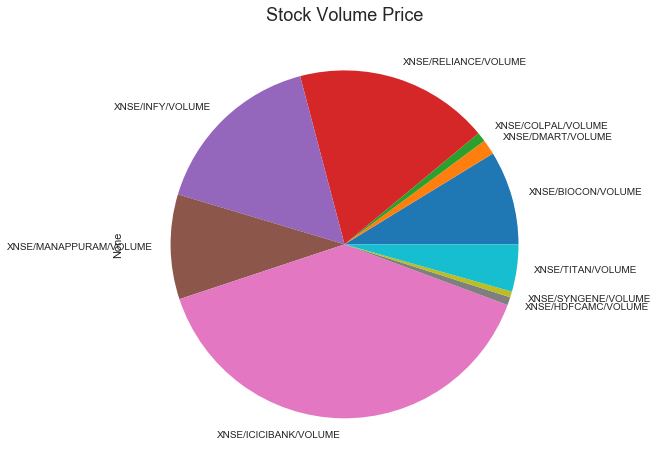

In [6]:
plt.figure(figsize=(12,8))
df.mean()[:10].plot(kind = "pie")
plt.title("Stock Volume Price", size = 18)
plt.show()

In [7]:
# create the new data frame for closing price of each stocks
df1 = data[["DATE",'XNSE/BIOCON/CLOSE',"DATE.1",'XNSE/DMART/CLOSE',"DATE.2",'XNSE/COLPAL/CLOSE',"DATE.3",'XNSE/RELIANCE/CLOSE',"DATE.4",'XNSE/INFY/CLOSE',"DATE.5",'XNSE/MANAPPURAM/CLOSE',"DATE.6",'XNSE/ICICIBANK/CLOSE',"DATE.7",'XNSE/HDFCAMC/CLOSE',"DATE.8",'XNSE/SYNGENE/CLOSE',"DATE.9",'XNSE/TITAN/CLOSE']]
df1.head()

,DATE,XNSE/BIOCON/CLOSE,DATE.1,XNSE/DMART/CLOSE,DATE.2,XNSE/COLPAL/CLOSE,DATE.3,XNSE/RELIANCE/CLOSE,DATE.4,XNSE/INFY/CLOSE,DATE.5,XNSE/MANAPPURAM/CLOSE,DATE.6,XNSE/ICICIBANK/CLOSE,DATE.7,XNSE/HDFCAMC/CLOSE,DATE.8,XNSE/SYNGENE/CLOSE,DATE.9,XNSE/TITAN/CLOSE
0,2020-09-21,429.35,2020-09-21,2097.45,2020-09-21,1367.40,2020-09-21,2255.85,2020-09-21,1009.90,2016-11-23,72.468441,2016-11-23,237.342435,2016-11-23,NaN,2016-11-23,262.487659,2016-11-23,307.067508
1,2020-09-18,454.00,2020-09-18,2149.05,2020-09-18,1372.65,2020-09-18,2305.70,2020-09-18,1002.15,2016-11-24,68.585368,2016-11-24,232.281160,2016-11-24,NaN,2016-11-24,262.139499,2016-11-24,302.203558
2,2020-09-17,442.20,2020-09-17,2139.05,2020-09-17,1397.50,2020-09-17,2298.75,2020-09-17,1011.00,2016-11-25,69.006424,2016-11-25,232.997800,2016-11-25,NaN,2016-11-25,267.113211,2016-11-25,310.654056
3,2020-09-16,438.65,2020-09-16,2135.95,2020-09-16,1420.40,2020-09-16,2324.55,2020-09-16,1001.75,2016-11-28,67.649687,2016-11-28,228.697956,2016-11-28,NaN,2016-11-28,277.707218,2016-11-28,301.220942
4,2020-09-15,440.05,2020-09-15,2136.15,2020-09-15,1420.15,2020-09-15,2318.85,2020-09-15,982.45,2016-11-29,71.673113,2016-11-29,228.832326,2016-11-29,NaN,2016-11-29,285.615421,2016-11-29,308.394039


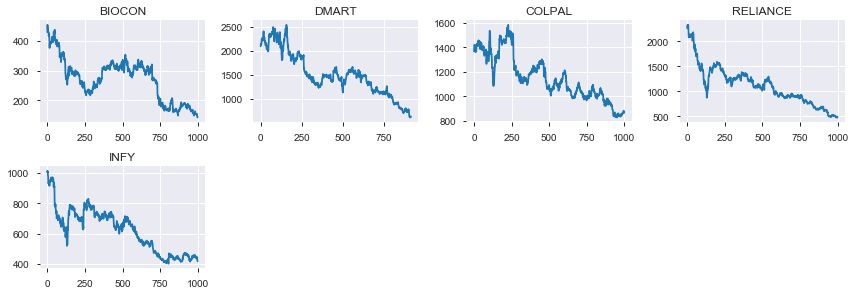

In [8]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(441)
ax2 = fig.add_subplot(442)
ax3 = fig.add_subplot(443)
ax4 = fig.add_subplot(444)
ax5 = fig.add_subplot(445)
ax1.plot(df1['XNSE/BIOCON/CLOSE'])
ax1.set_title("BIOCON")
ax2.plot(df1['XNSE/DMART/CLOSE'])
ax2.set_title("DMART")
ax3.plot(df1['XNSE/COLPAL/CLOSE'])
ax3.set_title("COLPAL")
ax4.plot(df1['XNSE/RELIANCE/CLOSE'])
ax4.set_title("RELIANCE")
ax5.plot(df1['XNSE/INFY/CLOSE'])
ax5.set_title("INFY")
plt.tight_layout()
plt.show()

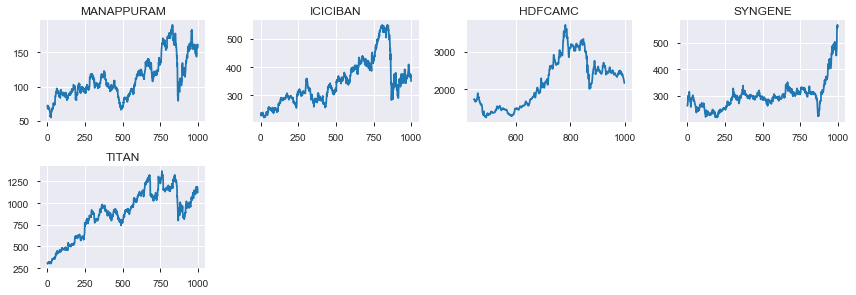

In [9]:
fig = plt.figure(figsize=(12,8))

ax6 = fig.add_subplot(441)
ax7 = fig.add_subplot(442)
ax8 = fig.add_subplot(443)
ax9 = fig.add_subplot(444)
ax10 = fig.add_subplot(445)

ax6.plot(df1['XNSE/MANAPPURAM/CLOSE'])
ax6.set_title("MANAPPURAM")
ax7.plot(df1['XNSE/ICICIBANK/CLOSE'])
ax7.set_title("ICICIBAN")
ax8.plot(df1['XNSE/HDFCAMC/CLOSE'])
ax8.set_title("HDFCAMC")
ax9.plot(df1['XNSE/SYNGENE/CLOSE'])
ax9.set_title("SYNGENE")
ax10.plot(df1['XNSE/TITAN/CLOSE'])
ax10.set_title("TITAN")
plt.tight_layout()
plt.show()

# Data sorting by ascending order

In [10]:
# ceate only colsing prices of each stock
data_1 = data[["DATE",'XNSE/BIOCON/CLOSE','XNSE/DMART/CLOSE','XNSE/COLPAL/CLOSE','XNSE/RELIANCE/CLOSE','XNSE/INFY/CLOSE']]
data_1 = data_1.sort_values(by =["DATE"],ascending=True, ignore_index=True)
data_1.head()

,DATE,XNSE/BIOCON/CLOSE,XNSE/DMART/CLOSE,XNSE/COLPAL/CLOSE,XNSE/RELIANCE/CLOSE,XNSE/INFY/CLOSE
0,2016-11-23,142.672376,NaN,864.347304,488.533896,417.578843
1,2016-11-24,141.694941,NaN,874.499034,478.051479,422.139198
2,2016-11-25,145.347897,NaN,864.674779,481.125998,443.556988
3,2016-11-28,146.176232,NaN,872.908440,477.712555,444.577964
4,2016-11-29,152.430159,NaN,879.785419,483.062703,441.333531


In [11]:
df2 = data_1[['XNSE/BIOCON/CLOSE','XNSE/DMART/CLOSE','XNSE/COLPAL/CLOSE','XNSE/RELIANCE/CLOSE','XNSE/INFY/CLOSE']]
df2.head()

,XNSE/BIOCON/CLOSE,XNSE/DMART/CLOSE,XNSE/COLPAL/CLOSE,XNSE/RELIANCE/CLOSE,XNSE/INFY/CLOSE
0,142.672376,NaN,864.347304,488.533896,417.578843
1,141.694941,NaN,874.499034,478.051479,422.139198
2,145.347897,NaN,864.674779,481.125998,443.556988
3,146.176232,NaN,872.908440,477.712555,444.577964
4,152.430159,NaN,879.785419,483.062703,441.333531


In [12]:
data_2 = data[["DATE.5",'XNSE/MANAPPURAM/CLOSE','XNSE/ICICIBANK/CLOSE','XNSE/HDFCAMC/CLOSE','XNSE/SYNGENE/CLOSE','XNSE/TITAN/CLOSE']]
data_2 = data_2.sort_values(by =["DATE.5"],ascending=True, ignore_index=True)
data_2.head()

,DATE.5,XNSE/MANAPPURAM/CLOSE,XNSE/ICICIBANK/CLOSE,XNSE/HDFCAMC/CLOSE,XNSE/SYNGENE/CLOSE,XNSE/TITAN/CLOSE
0,2016-11-23,72.468441,237.342435,NaN,262.487659,307.067508
1,2016-11-24,68.585368,232.281160,NaN,262.139499,302.203558
2,2016-11-25,69.006424,232.997800,NaN,267.113211,310.654056
3,2016-11-28,67.649687,228.697956,NaN,277.707218,301.220942
4,2016-11-29,71.673113,228.832326,NaN,285.615421,308.394039


In [13]:
data_1 = data_1.drop("DATE", axis = 1)

In [14]:
data_2 = data_2.drop("DATE.5", axis = 1)

In [15]:
df2 = pd.concat([data_1, data_2], axis = 1)
df2.head()

,XNSE/BIOCON/CLOSE,XNSE/DMART/CLOSE,XNSE/COLPAL/CLOSE,XNSE/RELIANCE/CLOSE,XNSE/INFY/CLOSE,XNSE/MANAPPURAM/CLOSE,XNSE/ICICIBANK/CLOSE,XNSE/HDFCAMC/CLOSE,XNSE/SYNGENE/CLOSE,XNSE/TITAN/CLOSE
0,142.672376,NaN,864.347304,488.533896,417.578843,72.468441,237.342435,NaN,262.487659,307.067508
1,141.694941,NaN,874.499034,478.051479,422.139198,68.585368,232.281160,NaN,262.139499,302.203558
2,145.347897,NaN,864.674779,481.125998,443.556988,69.006424,232.997800,NaN,267.113211,310.654056
3,146.176232,NaN,872.908440,477.712555,444.577964,67.649687,228.697956,NaN,277.707218,301.220942
4,152.430159,NaN,879.785419,483.062703,441.333531,71.673113,228.832326,NaN,285.615421,308.394039


# Mean of closing price 

In [16]:
df2.mean()

XNSE/BIOCON/CLOSE         270.328204
XNSE/DMART/CLOSE         1515.595301
XNSE/COLPAL/CLOSE        1150.634087
XNSE/RELIANCE/CLOSE      1110.656982
XNSE/INFY/CLOSE           619.508083
XNSE/MANAPPURAM/CLOSE     112.189503
XNSE/ICICIBANK/CLOSE      345.469888
XNSE/HDFCAMC/CLOSE       2175.033947
XNSE/SYNGENE/CLOSE        299.391468
XNSE/TITAN/CLOSE          875.538622
dtype: float64

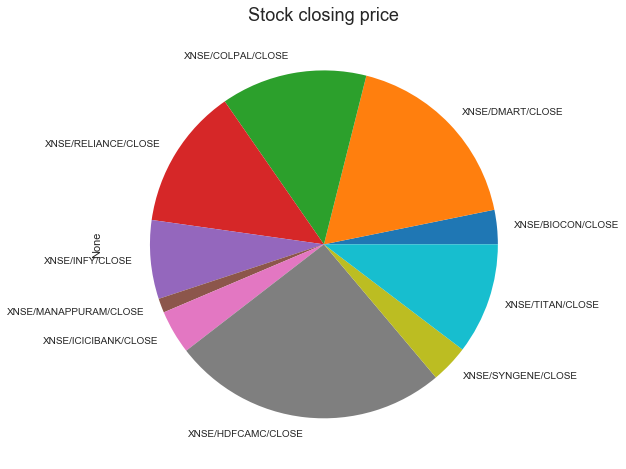

In [17]:
plt.figure(figsize=(12,8))
df2.mean()[:10].plot(kind = "pie")
plt.title("Stock closing price", size = 18)
plt.show()


Variance
$$s^2 = \frac{\sum_{i=1}^N (x_i - \bar{x})^2}{N-1}$$
Standard Deviation (Volatility)
$$s = \sqrt{\frac{\sum_{i=1}^N (x_i - \bar{x})^2}{N-1}}$$

# Calculating the daily  returns for individual stock

In [18]:
#daily_return.to_csv("daily_return.csv")

In [19]:
daily_return = df2.pct_change()
daily_return.head()

,XNSE/BIOCON/CLOSE,XNSE/DMART/CLOSE,XNSE/COLPAL/CLOSE,XNSE/RELIANCE/CLOSE,XNSE/INFY/CLOSE,XNSE/MANAPPURAM/CLOSE,XNSE/ICICIBANK/CLOSE,XNSE/HDFCAMC/CLOSE,XNSE/SYNGENE/CLOSE,XNSE/TITAN/CLOSE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.006851,NaN,0.011745,-0.021457,0.010921,-0.053583,-0.021325,NaN,-0.001326,-0.015840
2,0.025780,NaN,-0.011234,0.006431,0.050736,0.006139,0.003085,NaN,0.018974,0.027963
3,0.005699,NaN,0.009522,-0.007095,0.002302,-0.019661,-0.018454,NaN,0.039661,-0.030365
4,0.042783,NaN,0.007878,0.011200,-0.007298,0.059474,0.000588,NaN,0.028477,0.023813


In [20]:
daily_return.sum()

XNSE/BIOCON/CLOSE        1.346883
XNSE/DMART/CLOSE         1.403753
XNSE/COLPAL/CLOSE        0.555850
XNSE/RELIANCE/CLOSE      1.727489
XNSE/INFY/CLOSE          1.047547
XNSE/MANAPPURAM/CLOSE    1.184225
XNSE/ICICIBANK/CLOSE     0.641098
XNSE/HDFCAMC/CLOSE       0.373433
XNSE/SYNGENE/CLOSE       0.927490
XNSE/TITAN/CLOSE         1.527298
dtype: float64

In [21]:
# mean of daily return
daily_return.mean()

XNSE/BIOCON/CLOSE        0.001348
XNSE/DMART/CLOSE         0.001536
XNSE/COLPAL/CLOSE        0.000556
XNSE/RELIANCE/CLOSE      0.001729
XNSE/INFY/CLOSE          0.001049
XNSE/MANAPPURAM/CLOSE    0.001185
XNSE/ICICIBANK/CLOSE     0.000642
XNSE/HDFCAMC/CLOSE       0.000673
XNSE/SYNGENE/CLOSE       0.000928
XNSE/TITAN/CLOSE         0.001529
dtype: float64

# Standard deviation in % formate

In [22]:
daily_return.std()*100

XNSE/BIOCON/CLOSE        2.226378
XNSE/DMART/CLOSE         2.170728
XNSE/COLPAL/CLOSE        1.398917
XNSE/RELIANCE/CLOSE      1.991660
XNSE/INFY/CLOSE          1.805417
XNSE/MANAPPURAM/CLOSE    2.882227
XNSE/ICICIBANK/CLOSE     2.238159
XNSE/HDFCAMC/CLOSE       2.290779
XNSE/SYNGENE/CLOSE       1.861799
XNSE/TITAN/CLOSE         2.172252
dtype: float64

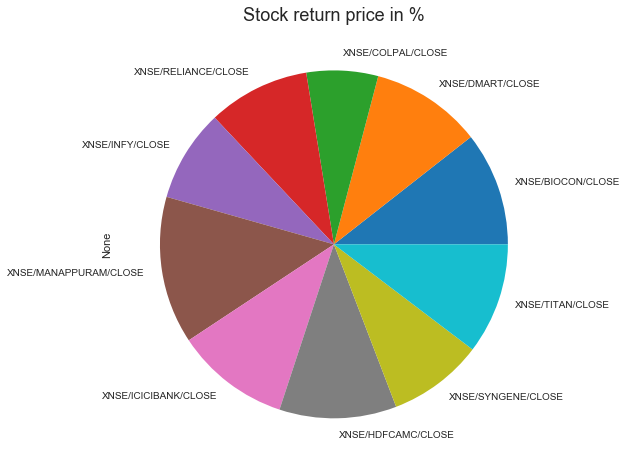

In [23]:
plt.figure(figsize=(12,8))
(daily_return.std()*100)[:10].plot(kind = "pie")
plt.title("Stock return price in %", size = 18)
plt.show()

<Figure size 432x288 with 0 Axes>

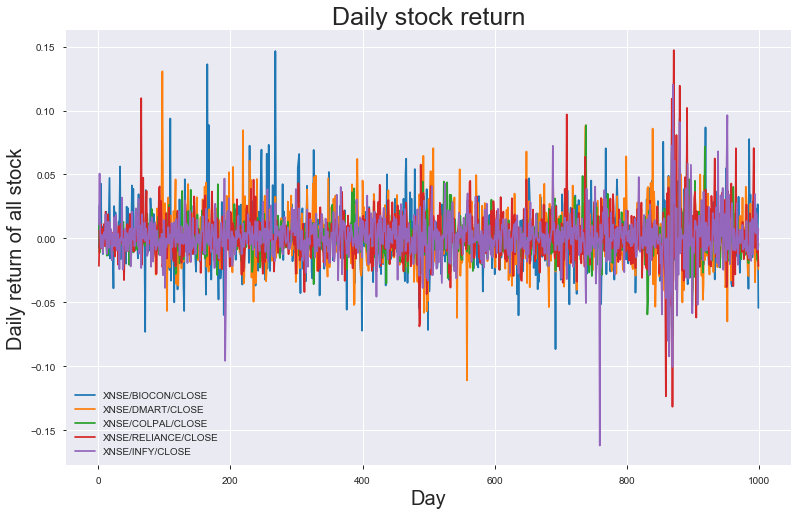

In [24]:
plt.figure()
daily_return[['XNSE/BIOCON/CLOSE','XNSE/DMART/CLOSE','XNSE/COLPAL/CLOSE','XNSE/RELIANCE/CLOSE','XNSE/INFY/CLOSE']].plot(figsize = (13, 8))
plt.ylabel("Daily return of all stock",size = 20)
plt.xlabel("Day", size = 20)
plt.title("Daily stock return", size =25)
plt.show()

<Figure size 432x288 with 0 Axes>

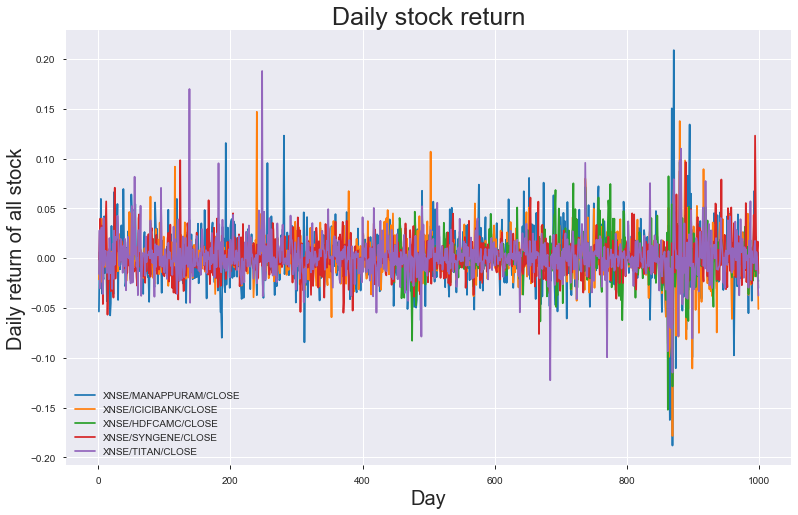

In [25]:
plt.figure()
daily_return[['XNSE/MANAPPURAM/CLOSE','XNSE/ICICIBANK/CLOSE','XNSE/HDFCAMC/CLOSE','XNSE/SYNGENE/CLOSE','XNSE/TITAN/CLOSE']].plot(figsize = (13, 8))
plt.ylabel("Daily return of all stock",size = 20)
plt.xlabel("Day", size = 20)
plt.title("Daily stock return",size = 25)
plt.show()

In [26]:


var_90 = daily_return.quantile(0.1)
var_95 = daily_return.quantile(1-0.95)
var_99 = daily_return.quantile(1-0.99)

var_90


XNSE/BIOCON/CLOSE       -0.021931
XNSE/DMART/CLOSE        -0.022731
XNSE/COLPAL/CLOSE       -0.014435
XNSE/RELIANCE/CLOSE     -0.018163
XNSE/INFY/CLOSE         -0.016519
XNSE/MANAPPURAM/CLOSE   -0.028666
XNSE/ICICIBANK/CLOSE    -0.020992
XNSE/HDFCAMC/CLOSE      -0.024571
XNSE/SYNGENE/CLOSE      -0.019430
XNSE/TITAN/CLOSE        -0.019323
Name: 0.1, dtype: float64

In [27]:
var_95

XNSE/BIOCON/CLOSE       -0.032465
XNSE/DMART/CLOSE        -0.033395
XNSE/COLPAL/CLOSE       -0.019395
XNSE/RELIANCE/CLOSE     -0.024405
XNSE/INFY/CLOSE         -0.023361
XNSE/MANAPPURAM/CLOSE   -0.039805
XNSE/ICICIBANK/CLOSE    -0.029094
XNSE/HDFCAMC/CLOSE      -0.033839
XNSE/SYNGENE/CLOSE      -0.026183
XNSE/TITAN/CLOSE        -0.027928
Name: 0.050000000000000044, dtype: float64

In [28]:
var_99

XNSE/BIOCON/CLOSE       -0.055673
XNSE/DMART/CLOSE        -0.050546
XNSE/COLPAL/CLOSE       -0.030066
XNSE/RELIANCE/CLOSE     -0.041557
XNSE/INFY/CLOSE         -0.050524
XNSE/MANAPPURAM/CLOSE   -0.071917
XNSE/ICICIBANK/CLOSE    -0.061298
XNSE/HDFCAMC/CLOSE      -0.061595
XNSE/SYNGENE/CLOSE      -0.041129
XNSE/TITAN/CLOSE        -0.054330
Name: 0.010000000000000009, dtype: float64

In [29]:
var = pd.DataFrame({"VAR_90":var_90, "VAR_95":var_95, "VAR_99": var_99})
var

,VAR_90,VAR_95,VAR_99
XNSE/BIOCON/CLOSE,-0.021931,-0.032465,-0.055673
XNSE/DMART/CLOSE,-0.022731,-0.033395,-0.050546
XNSE/COLPAL/CLOSE,-0.014435,-0.019395,-0.030066
XNSE/RELIANCE/CLOSE,-0.018163,-0.024405,-0.041557
XNSE/INFY/CLOSE,-0.016519,-0.023361,-0.050524
XNSE/MANAPPURAM/CLOSE,-0.028666,-0.039805,-0.071917
XNSE/ICICIBANK/CLOSE,-0.020992,-0.029094,-0.061298
XNSE/HDFCAMC/CLOSE,-0.024571,-0.033839,-0.061595
XNSE/SYNGENE/CLOSE,-0.019430,-0.026183,-0.041129
XNSE/TITAN/CLOSE,-0.019323,-0.027928,-0.054330


In [30]:
stocks = df2[['XNSE/BIOCON/CLOSE', 'XNSE/DMART/CLOSE', 'XNSE/COLPAL/CLOSE',
       'XNSE/RELIANCE/CLOSE', 'XNSE/INFY/CLOSE','XNSE/MANAPPURAM/CLOSE',
       'XNSE/ICICIBANK/CLOSE','XNSE/SYNGENE/CLOSE','XNSE/TITAN/CLOSE']]
return_stock = stocks.pct_change()

In [31]:

return_stock.dropna(inplace=True)

In [32]:
return_stock.shape

(914, 9)

In [33]:
return_stock.head()

,XNSE/BIOCON/CLOSE,XNSE/DMART/CLOSE,XNSE/COLPAL/CLOSE,XNSE/RELIANCE/CLOSE,XNSE/INFY/CLOSE,XNSE/MANAPPURAM/CLOSE,XNSE/ICICIBANK/CLOSE,XNSE/SYNGENE/CLOSE,XNSE/TITAN/CLOSE
86,-0.005726,-0.005794,0.001479,0.010796,0.012406,0.055869,0.007358,0.000000,0.014021
87,0.012493,-0.028274,-0.001732,0.010563,-0.008698,0.034741,0.029219,-0.006370,-0.008960
88,-0.008970,-0.004053,0.003266,-0.027705,-0.002472,0.019112,-0.005823,0.023443,0.000000
89,0.006888,0.023438,0.004526,-0.004276,0.006123,0.029397,0.014095,-0.015894,0.012725
90,0.008945,-0.000875,0.003696,0.008750,-0.003188,-0.025603,0.018773,-0.003135,0.002976


In [34]:
#from pandas_datareader import data as pdr

nifty_return = pd.read_csv("^NSEI.csv")
#nifty_return =market_return
# [963:984]
nifty_return

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-09-01,8793.599609,8813.250000,8759.950195,8774.650391,8774.650391,238900.0
1,2016-09-02,8796.349609,8824.099609,8768.200195,8809.650391,8809.650391,191500.0
2,2016-09-06,8852.700195,8950.849609,8848.450195,8943.000000,8943.000000,195600.0
3,2016-09-07,8968.700195,8968.700195,8913.349609,8917.950195,8917.950195,290100.0
4,2016-09-08,8915.500000,8960.349609,8896.000000,8952.500000,8952.500000,217200.0
...,...,...,...,...,...,...,...
995,2020-09-16,11538.450195,11618.099609,11516.750000,11604.549805,11604.549805,527800.0
996,2020-09-17,11539.400391,11587.200195,11498.500000,11516.099609,11516.099609,0.0
997,2020-09-18,11584.099609,11584.099609,11446.099609,11504.950195,11504.950195,764200.0
998,2020-09-21,11503.799805,11535.250000,11218.500000,11250.549805,11250.549805,602900.0


In [35]:
nifty_return = nifty_return["Close"].pct_change()

In [36]:
nifty_return.dropna(inplace=True)
nifty_return = nifty_return[85:]
nifty_return.shape

(914,)

In [37]:
nifty_return.dropna(inplace=True)
nifty_return.shape

(914,)

In [38]:
x1 = return_stock
y = nifty_return

x1= return_stock.values
y= nifty_return.values

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     7.603
Date:                Sun, 11 Oct 2020   Prob (F-statistic):           8.38e-11
Time:                        16:46:30   Log-Likelihood:                 2776.8
No. Observations:                 914   AIC:                            -5534.
Df Residuals:                     904   BIC:                            -5486.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.654      0.514      -0.001       0.001
x1            -0.0206      0.019     -1.109      0.268      -0.057       0.016
x2            -0.0353      0.019     -1.821      0.069      -0.073       0.003
x3            -0.0252      0.029     -0.876      0.381      -0.082       0.031
x4             0.0125      0.023      0.554      0.580      -0.032       0.057
x5             0.0537      0.022      2.411      0.016       0.010       0.097
x6             0.0360      0.016      2.249      0.025       0.005       0.067
x7             0.0753      0.021      3.656      0.000       0.035       0.116
x8             0.0702      0.023      3.112      0.002       0.026       0.114
x9             0.0041      0.020      0.204      0.838      -0.035       0.043
==============================================================================
Omnibus:                      352.840   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16425.546
Skew:                          -0.995   Prob(JB):                         0.00
Kurtosis:                      23.672   Cond. No.                         76.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
from statsmodels import regression

In [40]:
x1 = return_stock["XNSE/BIOCON/CLOSE"] 
y = nifty_return

x1= x1.values
y= nifty_return.values

x1 = sm.add_constant(x1)
results_1 = regression.linear_model.OLS(y,x1).fit()
print("alpha",results_1.params[0])
print("beta",results_1.params[1])


alpha 0.00037491559138075613
beta 0.025292348290063542


In [41]:
x2 = return_stock["XNSE/DMART/CLOSE"] 
y = nifty_return

x2= x2.values
y= nifty_return.values

x2 = sm.add_constant(x2)
results_2 = regression.linear_model.OLS(y,x2).fit()
print("alpha",results_2.params[0])
print("beta",results_2.params[1])


alpha 0.0003844250376614462
beta 0.012829183539503183


In [42]:
x3 = return_stock["XNSE/COLPAL/CLOSE"] 
y = nifty_return

x3= x3.values
y= nifty_return.values

x3 = sm.add_constant(x3)
results_3 = regression.linear_model.OLS(y,x3).fit()
print("alpha",results_3.params[0])
print("beta",results_3.params[1])


alpha 0.00038696101101716695
beta 0.032009859023356665


In [43]:
x4 = return_stock["XNSE/RELIANCE/CLOSE"] 
y = nifty_return

x4= x4.values
y= nifty_return.values

x4 = sm.add_constant(x4)
results_4 = regression.linear_model.OLS(y,x4).fit()
print("alpha",results_4.params[0])
print("beta",results_4.params[1])


alpha 0.0002806260661852622
beta 0.07556711822267087


In [44]:
x5 = return_stock["XNSE/INFY/CLOSE"] 
y = nifty_return

x5= x5.values
y= nifty_return.values

x5 = sm.add_constant(x5)
results_5 = regression.linear_model.OLS(y,x5).fit()
print("alpha",results_5.params[0])
print("beta",results_5.params[1])


alpha 0.0003106253639596463
beta 0.09191516847469797


In [45]:
x6 = return_stock["XNSE/MANAPPURAM/CLOSE"] 
y = nifty_return

x6= x6.values
y= nifty_return.values

x6 = sm.add_constant(x6)
results_6 = regression.linear_model.OLS(y,x6).fit()
print("alpha",results_6.params[0])
print("beta",results_6.params[1])


alpha 0.0003249920844716305
beta 0.07149534949510553


In [46]:
x7 = return_stock["XNSE/ICICIBANK/CLOSE"] 
y = nifty_return

x7= x7.values
y= nifty_return.values

x7 = sm.add_constant(x7)
results_7 = regression.linear_model.OLS(y,x7).fit()
print("alpha",results_7.params[0])
print("beta",results_7.params[1])


alpha 0.00033063456935067967
beta 0.10658500140186189


In [47]:
x8 = return_stock["XNSE/SYNGENE/CLOSE"] 
y = nifty_return

x8= x8.values
y= nifty_return.values

x8 = sm.add_constant(x8)
results_8 = regression.linear_model.OLS(y,x8).fit()
print(results_8.params[0])
print(results_8.params[1])



0.0003061827759715614
0.09818186720727096


In [48]:
x9 = return_stock["XNSE/BIOCON/CLOSE"] 
y = nifty_return

x9= x9.values
y= nifty_return.values

x9 = sm.add_constant(x9)
results_9 = regression.linear_model.OLS(y,x9).fit()
print("alpha",results_9.params[0])
print("beta",results_9.params[1])


alpha 0.00037491559138075613
beta 0.025292348290063542


In [49]:
results.params[9]

0.0040937251282575325

In [50]:
Alpha_beta = pd.DataFrame({"Stock name":["BIOCON","DMART","COLPAL","RELIANCE","INFY","MANAPPURAM","ICICIBANK","SYNCENE","TITAN"],
                       "Regression_Alpha":[results_1.params[0],results_2.params[0],results_3.params[0],results_4.params[0],results_5.params[0],results_6.params[0],results_7.params[0],results_8.params[0],results_9.params[0]],
                  "Regression_beta":[results_1.params[1],results_2.params[1],results_3.params[1],results_4.params[1],results_5.params[1],results_6.params[1],results_7.params[1],results_8.params[1],results_9.params[1]]})
                   
Alpha_beta

,Stock name,Regression_Alpha,Regression_beta
0,BIOCON,0.000375,0.025292
1,DMART,0.000384,0.012829
2,COLPAL,0.000387,0.032010
3,RELIANCE,0.000281,0.075567
4,INFY,0.000311,0.091915
5,MANAPPURAM,0.000325,0.071495
6,ICICIBANK,0.000331,0.106585
7,SYNCENE,0.000306,0.098182
8,TITAN,0.000375,0.025292


# Calulating the avarge ture Range

In [51]:
# open and and close price two data frame

df3 = data[['XNSE/BIOCON/OPEN','XNSE/DMART/OPEN','XNSE/COLPAL/OPEN','XNSE/RELIANCE/OPEN','XNSE/INFY/OPEN','XNSE/MANAPPURAM/OPEN','XNSE/ICICIBANK/OPEN','XNSE/HDFCAMC/OPEN','XNSE/SYNGENE/OPEN','XNSE/TITAN/OPEN']]
df4 = data[[ 'XNSE/DMART/CLOSE','XNSE/DMART/CLOSE','XNSE/COLPAL/CLOSE','XNSE/RELIANCE/CLOSE','XNSE/INFY/CLOSE','XNSE/MANAPPURAM/CLOSE','XNSE/ICICIBANK/CLOSE','XNSE/HDFCAMC/CLOSE','XNSE/SYNGENE/CLOSE','XNSE/TITAN/CLOSE']]
df3.head()


,XNSE/BIOCON/OPEN,XNSE/DMART/OPEN,XNSE/COLPAL/OPEN,XNSE/RELIANCE/OPEN,XNSE/INFY/OPEN,XNSE/MANAPPURAM/OPEN,XNSE/ICICIBANK/OPEN,XNSE/HDFCAMC/OPEN,XNSE/SYNGENE/OPEN,XNSE/TITAN/OPEN
0,453.95,2175.00,1376.1,2300.00,1001.0,70.971352,236.581004,NaN,262.960162,303.628352
1,442.75,2149.90,1407.0,2314.25,1011.0,72.515225,236.312264,NaN,260.125146,305.593584
2,439.00,2147.00,1415.0,2320.00,995.0,68.772504,235.058142,NaN,263.532139,305.495322
3,440.05,2152.55,1421.0,2320.00,986.0,68.070743,229.907287,NaN,269.077828,311.440149
4,430.00,2185.00,1416.6,2311.95,979.5,68.304664,228.877116,NaN,278.527881,300.680504


In [52]:
df4.head()

,XNSE/DMART/CLOSE,XNSE/DMART/CLOSE,XNSE/COLPAL/CLOSE,XNSE/RELIANCE/CLOSE,XNSE/INFY/CLOSE,XNSE/MANAPPURAM/CLOSE,XNSE/ICICIBANK/CLOSE,XNSE/HDFCAMC/CLOSE,XNSE/SYNGENE/CLOSE,XNSE/TITAN/CLOSE
0,2097.45,2097.45,1367.40,2255.85,1009.90,72.468441,237.342435,NaN,262.487659,307.067508
1,2149.05,2149.05,1372.65,2305.70,1002.15,68.585368,232.281160,NaN,262.139499,302.203558
2,2139.05,2139.05,1397.50,2298.75,1011.00,69.006424,232.997800,NaN,267.113211,310.654056
3,2135.95,2135.95,1420.40,2324.55,1001.75,67.649687,228.697956,NaN,277.707218,301.220942
4,2136.15,2136.15,1420.15,2318.85,982.45,71.673113,228.832326,NaN,285.615421,308.394039


In [53]:
df4.fillna(0,inplace=True)
df3.fillna(0,inplace=True)

In [54]:
# formula for the calculate ATR
data=(df4.values+df3.values)/2

In [55]:
# This is data frame for open and close divided by two 

df5=pd.DataFrame(data, columns =("BIOCON","DMART","COLPAL","RELIANCE","INFY","MANAPPURAM","ICICIBANK","HDFCAMC","SYNGENE","TITAN") )
df5.head()

,BIOCON,DMART,COLPAL,RELIANCE,INFY,MANAPPURAM,ICICIBANK,HDFCAMC,SYNGENE,TITAN
0,1275.700,2136.225,1371.750,2277.925,1005.450,71.719897,236.961720,0.0,262.723910,305.347930
1,1295.900,2149.475,1389.825,2309.975,1006.575,70.550297,234.296712,0.0,261.132322,303.898571
2,1289.025,2143.025,1406.250,2309.375,1003.000,68.889464,234.027971,0.0,265.322675,308.074689
3,1288.000,2144.250,1420.700,2322.275,993.875,67.860215,229.302621,0.0,273.392523,306.330545
4,1283.075,2160.575,1418.375,2315.400,980.975,69.988889,228.854721,0.0,282.071651,304.537271


In [56]:
df5.shape

(1000, 10)

In [57]:
# This is the mean of ATR of 1000 observation

mean_ATR = df5.mean()
mean_ATR

BIOCON         828.688678
DMART         1386.801350
COLPAL        1151.159705
RELIANCE      1110.855369
INFY           619.429796
MANAPPURAM     112.237182
ICICIBANK      345.565621
HDFCAMC       1209.669973
SYNGENE        299.549153
TITAN          875.697424
dtype: float64

In [58]:
ten_day_ATR = df5[991:].mean()
ten_day_ATR

BIOCON          73.922893
DMART            0.000000
COLPAL         870.182080
RELIANCE       482.137389
INFY           435.521536
MANAPPURAM     155.638889
ICICIBANK      368.836111
HDFCAMC       2317.080556
SYNGENE        527.655556
TITAN         1168.833333
dtype: float64

In [59]:
fifteen_day = df5[995:].mean()
fifteen_day 

BIOCON          71.813309
DMART            0.000000
COLPAL         868.412674
RELIANCE       482.091930
INFY           431.951904
MANAPPURAM     160.160000
ICICIBANK      367.755000
HDFCAMC       2267.120000
SYNGENE        560.450000
TITAN         1172.050000
dtype: float64

In [60]:
ATR = pd.DataFrame({"Mean_ATR":mean_ATR, "LAST_TEN_ATR": ten_day_ATR, "Last_fifteen_ATR":fifteen_day})
ATR

,Mean_ATR,LAST_TEN_ATR,Last_fifteen_ATR
BIOCON,828.688678,73.922893,71.813309
DMART,1386.801350,0.000000,0.000000
COLPAL,1151.159705,870.182080,868.412674
RELIANCE,1110.855369,482.137389,482.091930
INFY,619.429796,435.521536,431.951904
MANAPPURAM,112.237182,155.638889,160.160000
ICICIBANK,345.565621,368.836111,367.755000
HDFCAMC,1209.669973,2317.080556,2267.120000
SYNGENE,299.549153,527.655556,560.450000
TITAN,875.697424,1168.833333,1172.050000


In [61]:
# Import excel data file
data = pd.read_excel("Time Series Sample.xlsx")
data.head()

,DATE,XNSE/BIOCON/OPEN,XNSE/BIOCON/HIGH,XNSE/BIOCON/LOW,XNSE/BIOCON/CLOSE,XNSE/BIOCON/VOLUME,XNSE/BIOCON/ADJUSTMENT FACTOR,XNSE/BIOCON/ADJUSTMENT TYPE,DATE.1,XNSE/DMART/OPEN,...,XNSE/SYNGENE/ADJUSTMENT FACTOR,XNSE/SYNGENE/ADJUSTMENT TYPE,DATE.9,XNSE/TITAN/OPEN,XNSE/TITAN/HIGH,XNSE/TITAN/LOW,XNSE/TITAN/CLOSE,XNSE/TITAN/VOLUME,XNSE/TITAN/ADJUSTMENT FACTOR,XNSE/TITAN/ADJUSTMENT TYPE
0,2020-09-21,453.95,453.95,425.35,429.35,4258326.0,NaN,NaN,2020-09-21,2175.00,...,NaN,NaN,2016-11-23,303.628352,308.541432,300.926158,307.067508,1250719,NaN,NaN
1,2020-09-18,442.75,463.90,442.75,454.00,11410425.0,NaN,NaN,2020-09-18,2149.90,...,NaN,NaN,2016-11-24,305.593584,309.229263,300.680504,302.203558,2751768,NaN,NaN
2,2020-09-17,439.00,444.85,432.55,442.20,4431118.0,NaN,NaN,2020-09-17,2147.00,...,NaN,NaN,2016-11-25,305.495322,313.651035,300.975288,310.654056,1285140,NaN,NaN
3,2020-09-16,440.05,453.90,434.55,438.65,10058926.0,NaN,NaN,2020-09-16,2152.55,...,NaN,NaN,2016-11-28,311.440149,312.471896,298.469618,301.220942,1676934,NaN,NaN
4,2020-09-15,430.00,445.00,429.00,440.05,6044433.0,NaN,NaN,2020-09-15,2185.00,...,NaN,NaN,2016-11-29,300.680504,310.752318,299.943542,308.394039,1450559,NaN,NaN


In [62]:


def atr(data, n=14):
    data = data.copy()
    high = data['XNSE/BIOCON/HIGH']
    low = data['XNSE/BIOCON/LOW']
    close = data['XNSE/BIOCON/CLOSE']
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)
    atr = tr
    return atr

In [63]:
ATR_1 = atr(data)
print(ATR_1.mean())

ten_1 = ATR_1[991:].mean()
print(ten_1)

fifteen_1 = ATR_1[996:].mean()
print(fifteen_1)

10.23529632499999
4.926750888888888
5.276492499999996


In [64]:
def atr(data):
    data = data.copy()
    high = data['XNSE/DMART/HIGH']
    low = data['XNSE/DMART/LOW']
    close = data['XNSE/DMART/CLOSE']
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)
    atr = tr
    return atr

ATR_2 = atr(data)
print(ATR_2.mean())

ten_2 = ATR_2[991:].mean()
print(ten_2)

fifteen_2 = ATR_2[996:].mean()
print(fifteen_2)

57.037267759562894
nan
nan


In [65]:
def atr(data):
    data = data.copy()
    high = data['XNSE/COLPAL/HIGH']
    low = data['XNSE/COLPAL/LOW']
    close = data['XNSE/COLPAL/CLOSE']
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)
    atr = tr
    return atr

ATR_3 = atr(data)
print(ATR_3.mean())

ten_3 = ATR_3[991:].mean()
print(ten_3)

fifteen_3 = ATR_3[996:].mean()
print(fifteen_3)

30.203899404000012
18.899995222222213
22.05779149999998


In [66]:
def atr(data):
    data = data.copy()
    high = data['XNSE/RELIANCE/HIGH']
    low = data['XNSE/RELIANCE/LOW']
    close = data['XNSE/RELIANCE/CLOSE']
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)
    atr = tr
    return atr

ATR_4 = atr(data)
print(ATR_4.mean())

ten_4 = ATR_4[991:].mean()
print(ten_4)

fifteen_4 = ATR_4[996:].mean()
print(fifteen_4)

33.91718449999994
8.405838777777786
9.023835750000003


In [67]:
def atr(data):
    data = data.copy()
    high = data['XNSE/INFY/HIGH']
    low = data['XNSE/INFY/LOW']
    close = data['XNSE/INFY/CLOSE']
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)
    atr =tr
    return atr

ATR_5 = atr(data)
print(ATR_5.mean())

ten_5 = ATR_5[991:].mean()
print(ten_5)

fifteen_5 = ATR_5[996:].mean()
print(fifteen_5)

16.456720950999973
10.645871777777788
15.819443000000007


In [68]:
def atr(data, n=14):
    data = data.copy()
    high = data['XNSE/MANAPPURAM/HIGH']
    low = data['XNSE/MANAPPURAM/LOW']
    close = data['XNSE/MANAPPURAM/CLOSE']
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)
    atr = tr
    return atr

ATR_6 = atr(data)
print(ATR_6.mean())

ten_6 = ATR_6[991:].mean()
print(ten_6)

fifteen_6 = ATR_6[996:].mean()
print(fifteen_6)

4.416682346000004
6.211111111111115
5.587500000000006


In [69]:
def atr(data, n=14):
    data = data.copy()
    high = data['XNSE/ICICIBANK/HIGH']
    low = data['XNSE/ICICIBANK/LOW']
    close = data['XNSE/ICICIBANK/CLOSE']
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)
    atr = tr
    return atr

ATR_7 = atr(data)
print(ATR_7.mean())

ten_7 = ATR_7[991:].mean()
print(ten_7)

fifteen_7 = ATR_7[996:].mean()
print(fifteen_7)

9.772682086000001
11.677777777777774
12.537499999999994


In [70]:
def atr(data):
    data = data.copy()
    high = data['XNSE/HDFCAMC/HIGH']
    low = data['XNSE/HDFCAMC/LOW']
    close = data['XNSE/HDFCAMC/CLOSE']
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)
    atr = tr
    return atr

ATR_8 = atr(data)
print(ATR_8.mean())

ten_8 = ATR_8[991:].mean()
print(ten_8)

fifteen_8 = ATR_8[996:].mean()
print(fifteen_8)

69.96854497482023
60.17222222222214
67.09999999999991


In [71]:
def atr(data):
    data = data.copy()
    high = data['XNSE/SYNGENE/HIGH']
    low = data['XNSE/SYNGENE/LOW']
    close = data['XNSE/SYNGENE/CLOSE']
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)
    atr = tr
    return atr

ATR_9 = atr(data)
print(ATR_9.mean())

ten_9 = ATR_9[991:].mean()
print(ten_9)

fifteen_9 = ATR_9[991:].mean()
print(fifteen_9)

9.925654124000006
38.12222222222222
38.12222222222222


In [72]:
def atr(data):
    data = data.copy()
    high = data['XNSE/TITAN/HIGH']
    low = data['XNSE/TITAN/LOW']
    close = data['XNSE/TITAN/CLOSE']
    data['tr0'] = abs(high - low)
    data['tr1'] = abs(high - close.shift())
    data['tr2'] = abs(low - close.shift())
    tr = data[['tr0', 'tr1', 'tr2']].max(axis=1)
    atr = tr
    return atr

ATR_10 = atr(data)
print(ATR_10.mean())

ten_10 = ATR_10[991:].mean()
print(ten_10)

fifteen_10 = ATR_10[996:].mean()
print(fifteen_10)

24.706987587999983
34.66666666666664
37.17500000000001


In [73]:
ATR = pd.DataFrame({"Stock name":["BIOCON","DMART","COLPAL","RELIANCE","INFY","MANAPPURAM","ICICIBANK","HDFCAMC","SYNCENE","TITAN"],
                  "Mean_ATR_1000":[ATR_1.mean(),ATR_2.mean(),ATR_3.mean(),ATR_4.mean(),ATR_5.mean(),ATR_6.mean(),ATR_7.mean(),ATR_8.mean(),ATR_9.mean(),ATR_10.mean()],
                  "ten_day_ATR":[ten_1,ten_2,ten_3,ten_4,ten_5,ten_6,ten_7,ten_8,ten_9,ten_10],
                    "fifteen_day_ATR":[fifteen_1,fifteen_2,fifteen_3,fifteen_4,fifteen_5,fifteen_6,fifteen_7,fifteen_8,fifteen_9,fifteen_10]})

ATR

,Stock name,Mean_ATR_1000,ten_day_ATR,fifteen_day_ATR
0,BIOCON,10.235296,4.926751,5.276492
1,DMART,57.037268,NaN,NaN
2,COLPAL,30.203899,18.899995,22.057791
3,RELIANCE,33.917184,8.405839,9.023836
4,INFY,16.456721,10.645872,15.819443
5,MANAPPURAM,4.416682,6.211111,5.587500
6,ICICIBANK,9.772682,11.677778,12.537500
7,HDFCAMC,69.968545,60.172222,67.100000
8,SYNCENE,9.925654,38.122222,38.122222
9,TITAN,24.706988,34.666667,37.175000


In [74]:
data1 = df2["XNSE/BIOCON/CLOSE"][:]
data1 = data1.pct_change()

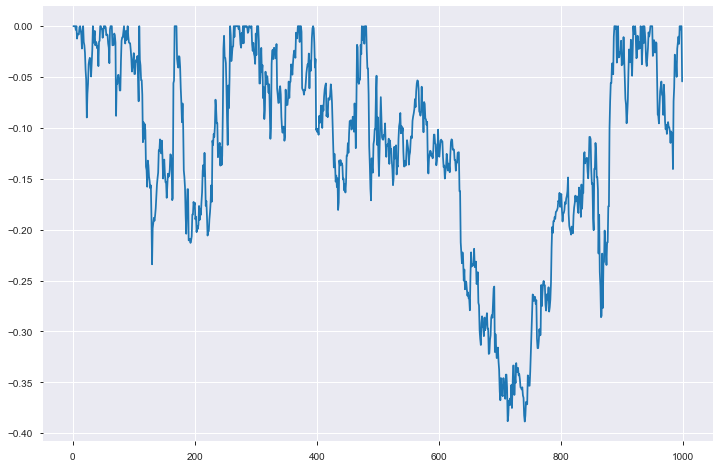

In [75]:
index = 100*(1+data1).cumprod()
previous_peaks = index.cummax()
drawdown = (index - previous_peaks)/previous_peaks
#drawdown.plot()
plt.figure(figsize=(12,8))
plt.plot(drawdown)

In [76]:
# Get the worst drawdown 
drawdown.min()

-0.3885887321103864

In [77]:
drawdown.idxmin()

741

In [78]:
# Get the worst drawdown since 1975
print(f"The worst drawdown since 100 days was {drawdown.min()} on {drawdown.idxmin()}")

The worst drawdown since 100 days was -0.3885887321103864 on 741


In [80]:
drawdown.max()

0.0

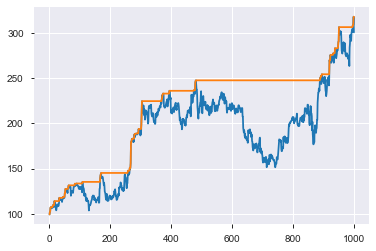

In [79]:
# Combine Plots 
index.plot.line()
previous_peaks.plot.line()